# From linear to multi-linear regression

In the last notebook we learned about linear regression and using python libraries to make our life simpler. If you want to read about that, have a look at

https://github.com/jegali/DataScience/blob/main/lesson-3-9-ticket-sample.ipynb

The last code snippet dealt with the usage of statsmodel which we will use again in this example.

In [20]:
# a reference to the pandas library
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt  

# This is new. Let's try a library which does 
# the linear regression for us
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# To visualize the data
import matplotlib.pyplot as plt  

# the excel file must be in the same directory as this notebook
# be sure to use the right excel data file.
# Udacity has some files named linear-example-data with different content
# I renamed this one to linear-example-data-3-13.xlsx 
excel_file= 'linear-example-data-3-13.xlsx'

# via pandas, the contents ae read into a variable or data frame named data
data = pd.read_excel(excel_file)

# let's have a look at the data
print (" Contents of the file ", excel_file)
print(data)

# instead of only using one column for linear regression,
# we use two columns for multilinear regression
# column industry is no number column, so we can not integrate it into the calculation
X = data[['Number of Employees','Value of Contract']]
Y = data['Average Number of Tickets']

# let's do the evaluation with sklearn
# Many roads lead to Rome...
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print ("\n\n")
print ("Linear Regression values evaluated by sklearn: ")
print(" ")
print('Y-intercept: \t', regr.intercept_)
print('Coefficients:\t', regr.coef_)

# let's to the evaluation with statsmodels
# we have to add a constant to the calculation or
# we do not have a Y-intercept
X = sm.add_constant(X)

# build the model
model = sm.OLS(Y,X).fit()
model_prediction = model.predict(X)
model_details = model.summary()

# and print the model summary
print("\n\n")
print("Linear Regression values evaluated by statsmodel: ")
print(" ")
print(model_details)

 Contents of the file  linear-example-data-3-13.xlsx
    Average Number of Tickets  Number of Employees  Value of Contract  \
0                           1                   51              25750   
1                           9                   68              25000   
2                          20                   67              40000   
3                           1                  124              35000   
4                           8                  124              25000   
5                          30                  134              50000   
6                          20                  157              48000   
7                           8                  190              32000   
8                          20                  205              70000   
9                          50                  230              75000   
10                         35                  265              50000   
11                         65                  296              75000  

The model above gave the following equation: 

\begin{equation}
Tickets = -24.267 + 0.1019 \cdot [Number \; of \; Employees] + 0.0007 \cdot [Value \; of \; Contract]
\end{equation}

What would the model predict for the number of tickets for a customer with 750 employees and a contract of $13,000? 
Inserting the value in the formula we get 61. Below we can see a visualization of the data as a scatter plot

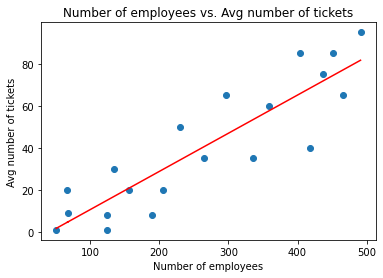

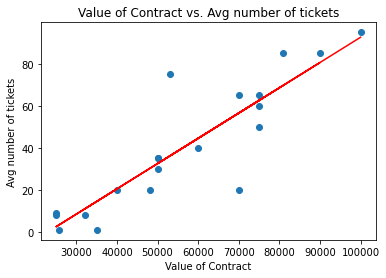

In [22]:
# create an object for linear regression from sklearn
linear_regressor = LinearRegression()  

# convert the values in an array that fits the function's need
X = data['Number of Employees'].values.reshape(-1, 1)
Y = data['Average Number of Tickets'].values.reshape(-1, 1)

# and do the regression calculation with sklearn
linear_regressor.fit(X,Y)
# make predictions on Y based on X
Y_pred = linear_regressor.predict(X)

print(" ")
# scatter plot
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.set_ylabel('Avg number of tickets')
ax.set_xlabel('Number of employees')
plt.scatter(X, Y)
# linear regression function
plt.title("Number of employees vs. Avg number of tickets")
plt.plot(X, Y_pred, color='red')

# show the graphs
plt.show()

###############################
###############################
###############################

# convert the values in an array that fits the function's need
X = data['Value of Contract'].values.reshape(-1, 1)
Y = data['Average Number of Tickets'].values.reshape(-1, 1)

# and do the regression calculation with sklearn
linear_regressor.fit(X,Y)
# make predictions on Y based on X
Y_pred = linear_regressor.predict(X)

print(" ")
# scatter plot
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.set_ylabel('Avg number of tickets')
ax.set_xlabel('Value of Contract')
plt.scatter(X, Y)
# linear regression function
plt.title("Value of Contract vs. Avg number of tickets")
plt.plot(X, Y_pred, color='red')

# show the graphs
plt.show()
